### 무게를 찾기
- 목 표 : 농어(Perch) 길이 피쳐를 사용해서 무게를 예측하기
- 데이터셋 : fish.csv
- 피쳐/속성 : Length
- 타겟/라벨 : Weight
- 학습-방법 : 지도학습 > 회귀
- 알고리즘 : 선형회귀 >>> 데이터분포가 선형의 형태

[1] 데이터 준비

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
FILE_PATH = '../Data/fish.csv'

In [24]:
fishDF = pd.read_csv(FILE_PATH)

In [25]:
fishDF.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [26]:
PerchDF = fishDF[fishDF['Species'] == 'Perch']
PerchDF.head()

,Species,Weight,Length,Diagonal,Height,Width
72,Perch,5.9,8.4,8.8,2.1120,1.4080
73,Perch,32.0,13.7,14.7,3.5280,1.9992
74,Perch,40.0,15.0,16.0,3.8240,2.4320
75,Perch,51.5,16.2,17.2,4.5924,2.6316
76,Perch,70.0,17.4,18.5,4.5880,2.9415


In [27]:
feature = PerchDF['Weight'].values.reshape(-1, 1)
target = PerchDF['Length']

In [28]:
feature

array([[   5.9],
       [  32. ],
       [  40. ],
       [  51.5],
       [  70. ],
       [ 100. ],
       [  78. ],
       [  80. ],
       [  85. ],
       [  85. ],
       [ 110. ],
       [ 115. ],
       [ 125. ],
       [ 130. ],
       [ 120. ],
       [ 120. ],
       [ 130. ],
       [ 135. ],
       [ 110. ],
       [ 130. ],
       [ 150. ],
       [ 145. ],
       [ 150. ],
       [ 170. ],
       [ 225. ],
       [ 145. ],
       [ 188. ],
       [ 180. ],
       [ 197. ],
       [ 218. ],
       [ 300. ],
       [ 260. ],
       [ 265. ],
       [ 250. ],
       [ 250. ],
       [ 300. ],
       [ 320. ],
       [ 514. ],
       [ 556. ],
       [ 840. ],
       [ 685. ],
       [ 700. ],
       [ 700. ],
       [ 690. ],
       [ 900. ],
       [ 650. ],
       [ 820. ],
       [ 850. ],
       [ 900. ],
       [1015. ],
       [ 820. ],
       [1100. ],
       [1000. ],
       [1100. ],
       [1000. ],
       [1000. ]])

In [29]:
target

72      8.4
73     13.7
74     15.0
75     16.2
76     17.4
77     18.0
78     18.7
79     19.0
80     19.6
81     20.0
82     21.0
83     21.0
84     21.0
85     21.3
86     22.0
87     22.0
88     22.0
89     22.0
90     22.0
91     22.5
92     22.5
93     22.7
94     23.0
95     23.5
96     24.0
97     24.0
98     24.6
99     25.0
100    25.6
101    26.5
102    27.3
103    27.5
104    27.5
105    27.5
106    28.0
107    28.7
108    30.0
109    32.8
110    34.5
111    35.0
112    36.5
113    36.0
114    37.0
115    37.0
116    39.0
117    39.0
118    39.0
119    40.0
120    40.0
121    40.0
122    40.0
123    42.0
124    43.0
125    43.0
126    43.5
127    44.0
Name: Length, dtype: float64

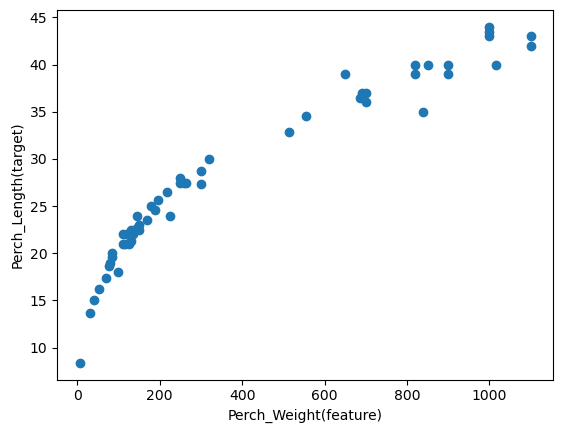

In [30]:
plt.scatter(feature, target)
plt.xlabel('Perch_Weight(feature)')
plt.ylabel('Perch_Length(target)')
plt.show()

In [31]:
from sklearn.preprocessing import PolynomialFeatures

In [32]:
poly=PolynomialFeatures(include_bias=False, degree=5)
poly_feature=poly.fit_transform(feature) # 한번만 쓸 경우
poly_feature.shape

(56, 5)

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [34]:
def polynomial_func(x):
    y = 1 + 2*x[:,0] + 3*x[:,0]**2 + 4*x[:,1]**3
    return y

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
%matplotlib inline

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
x_train, x_test, y_train, y_test = train_test_split(feature,
                                                    target,
                                                    test_size=0.2)

In [38]:
print(f'x_train: {x_train.shape}, {x_train.ndim}D')
print(f'y_train: {y_train.shape}, {y_train.ndim}D')

print(f'x_test: {x_test.shape}, {x_test.ndim}D')
print(f'y_test: {y_test.shape}, {y_test.ndim}D')

x_train: (44, 1), 2D
y_train: (44,), 1D
x_test: (12, 1), 2D
y_test: (12,), 1D


In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
lrmodel = LinearRegression()
model2 = LinearRegression()

In [41]:
lrmodel.fit(feature, target)
model2.fit(x_train, y_train)

LinearRegression()

In [42]:
# 학습 후 모델 파라미터
print(f'기울기: {lrmodel.coef_}, 절편: {lrmodel.intercept_}')
print(f'기울기: {model2.coef_}, 절편: {model2.intercept_}')

기울기: [0.02487985], 절편: 18.382802913636723
기울기: [0.02543324], 절편: 18.138653571464566


In [43]:
# y=ax+b
pre_length = lrmodel.coef_[0]*feature+lrmodel.intercept_
pre_length2 = model2.coef_[0]*feature+model2.intercept_
pre_length2

array([[18.2887097 ],
       [18.95251733],
       [19.15598328],
       [19.44846557],
       [19.91898055],
       [20.68197783],
       [20.12244649],
       [20.17331298],
       [20.30047919],
       [20.30047919],
       [20.93631026],
       [21.06347647],
       [21.3178089 ],
       [21.44497511],
       [21.19064268],
       [21.19064268],
       [21.44497511],
       [21.57214132],
       [20.93631026],
       [21.44497511],
       [21.95363996],
       [21.82647375],
       [21.95363996],
       [22.46230481],
       [23.86113316],
       [21.82647375],
       [22.92010318],
       [22.71663724],
       [23.14900236],
       [23.68310046],
       [25.76862635],
       [24.75129665],
       [24.87846286],
       [24.49696422],
       [24.49696422],
       [25.76862635],
       [26.2772912 ],
       [31.21134027],
       [32.27953645],
       [39.50257735],
       [35.56042475],
       [35.94192339],
       [35.94192339],
       [35.68759096],
       [41.02857191],
       [34

In [44]:
pre_length2.shape

(56, 1)

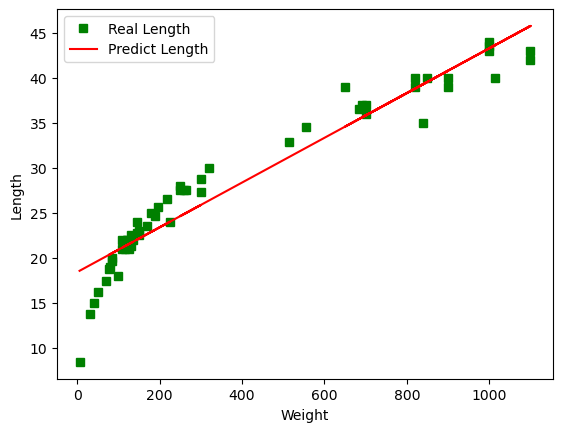

In [45]:
# 현재 데이터의 분포 확인

plt.plot(feature, PerchDF['Length'], 'gs', label='Real Length')
plt.plot(feature, pre_length, 'r-', label='Predict Length')
plt.xlabel('Weight')
plt.ylabel('Length')
# plt.vlines(PerchDF['Length'], pre_length[0], pre_length[-1])
plt.legend()
plt.show()

In [46]:
# lrmodel.score(feature, PerchDF['Length'])
lrmodel.score(feature, target)

0.919021073244782

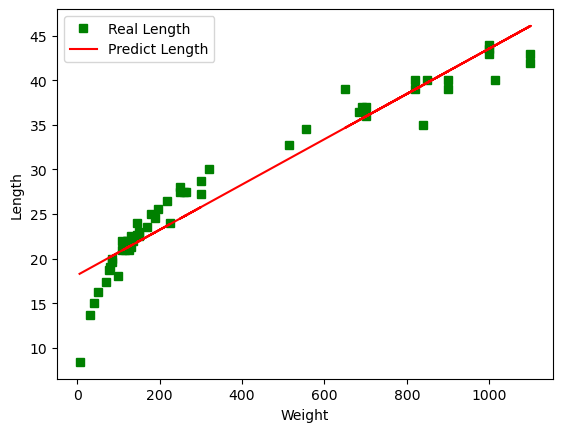

In [47]:
# 현재 데이터의 분포 확인 2

plt.plot(feature, PerchDF['Length'], 'gs', label='Real Length')
plt.plot(feature, pre_length2, 'r-', label='Predict Length')
plt.xlabel('Weight')
plt.ylabel('Length')
# plt.vlines(PerchDF['Length'], pre_length[0], pre_length[-1])
plt.legend()
plt.show()

In [48]:
model2.score(feature, target)

0.9185530841679244

In [49]:
pre_model2 = model2.predict(x_test)
pre_model2

array([20.17331298, 23.86113316, 22.71663724, 41.02857191, 21.3178089 ,
       46.11522043, 35.68759096, 21.95363996, 21.44497511, 22.92010318,
       35.56042475, 38.9939125 ])


Degree 1 회귀계수는 [0.02]입니다.
Degree 1 MSE 는 8.609648296453361입니다.

Degree 4 회귀계수는 [ 0.11 -0.    0.   -0.  ]입니다.
Degree 4 MSE 는 4.890258651803737입니다.

Degree 15 회귀계수는 [ 0. -0.  0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.]입니다.
Degree 15 MSE 는 59984.02387731831입니다.


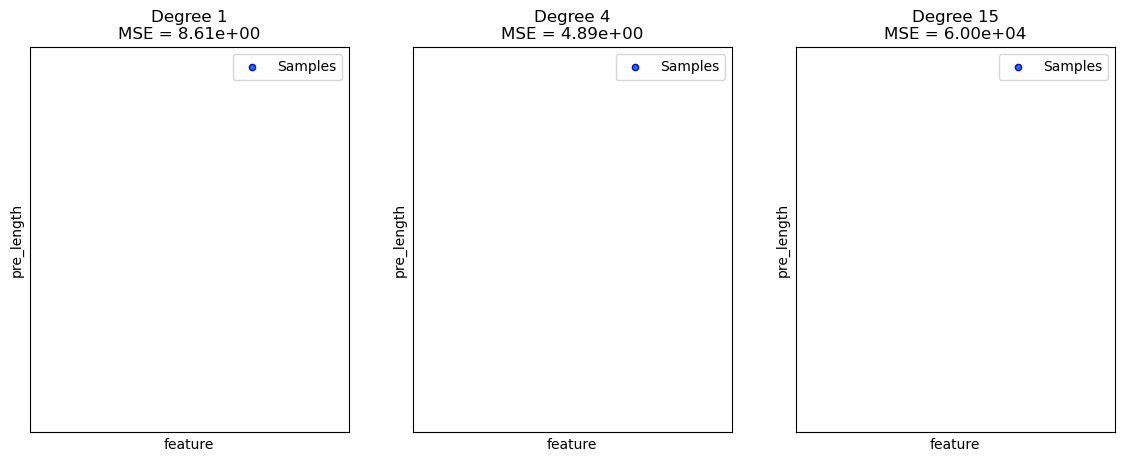

In [55]:
# y 값은 코사인 기반의 true_fun()에서 약간의 노이즈 변동 값을 더한 값입니다.
y = PerchDF['Length']
plt.figure(figsize=(14,5))
degrees=[1, 4, 15]

# 다항 회귀의 차수(degree)를 1, 4, 15로 각각 변화시키면서 비교합니다.
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    # 개별 degree별로 Polynomial 변환합니다.
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([('polynomial_features', polynomial_features),
                         ('linear_regression', linear_regression)])
    pipeline.fit(feature.reshape(-1, 1), y)

    # 교차 검증으로 다항 회귀를 평가합니다.
    scores = cross_val_score(pipeline, feature.reshape(-1, 1), y, scoring='neg_mean_squared_error', cv=10)
    # Pipeline을 구성하는 세부 객체를 접근하는 named_steps['객체명']을 이용해 회귀계수 추출
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀계수는 {1}입니다.'.format(degrees[i], np.round(coefficients, 2)))
    print('Degree {0} MSE 는 {1}입니다.'.format(degrees[i], -1*np.mean(scores)))
    
    # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교합니다.
    # 예측 값 곡선
    # plt.plot(feature, pipeline.predict(feature[:, np.newaxis]), label='model')
    # 실제 값 곡선
    # plt.plot(x_test, true_fun(x_test), label='True function')
    plt.scatter(feature, y, edgecolors='b', s=20, label='Samples')

    plt.xlabel('feature'); plt.ylabel('pre_length'); plt.xlim((0, 1)); plt.ylim((-2, 2)); plt.legend(loc='best')
    plt.title('Degree {}\nMSE = {:.2e}'.format(degrees[i], -scores.mean(), scores.std()))

plt.show()